                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

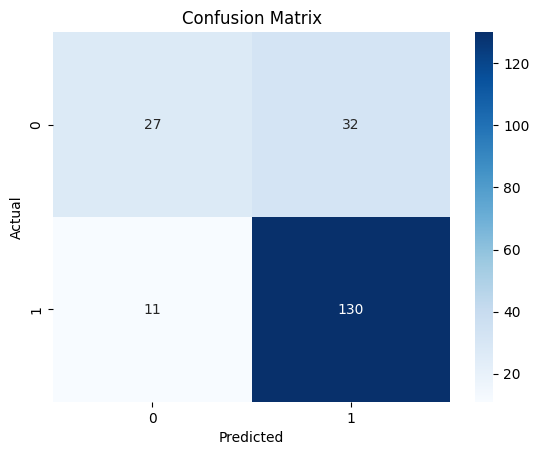

              precision    recall  f1-score   support

           0       0.71      0.46      0.56        59
           1       0.80      0.92      0.86       141

    accuracy                           0.79       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
data = pd.read_csv(url)

print(data.head())
print(data.columns)

X = data.drop(columns=['credit_risk'])
y = data['credit_risk']

numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
